# Técnicas de validación de modelos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
X = pd.get_dummies(df.drop('body_mass_g', axis=1))
y = df['body_mass_g']

## train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"train: {X_train.shape}, {y_train.shape}")
print(f"test: {X_test.shape}, {y_test.shape}")

train: (266, 11), (266,)
test: (67, 11), (67,)


## cross_val_score

Validación cruzada, dividir los datos en k partes para entrenar y validar múltiples veces

In [20]:
from sklearn.model_selection import cross_val_score

# neg_mean_absolute_error es la MAE pero en negativo para cumplir la convención de "mayor es mejor"
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[-220.38144928 -249.60757207 -285.90470845 -245.47929014 -181.47689761]
mean: -236.56998351139933, std: 34.584928220178625


<Axes: >

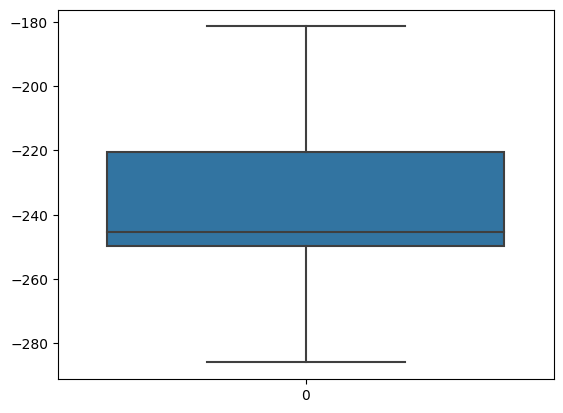

In [23]:
sns.boxplot(data=cv_results)

In [18]:
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[ -80190.73603549  -97691.86526981 -114758.81969422  -93803.50773163
  -54055.18649562]
mean: -88100.02304535339, std: 20282.171137693946


In [25]:
from sklearn.model_selection import cross_validate

# igual que cross_val_score pero con más información, muestra los tiempos de train (fit_time) y test (score_time)
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error')
cv_results

{'fit_time': array([0.00250316, 0.0010035 , 0.0020256 , 0.00100708, 0.0020082 ]),
 'score_time': array([0.00139475, 0.00100398, 0.00109124, 0.00158763, 0.00100541]),
 'test_score': array([-220.38144928, -249.60757207, -285.90470845, -245.47929014,
        -181.47689761])}

In [26]:
from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [31]:
cv_results = cross_validate(model, X, y, scoring='neg_root_mean_squared_error') # RMSE
cv_results

{'fit_time': array([0.00218821, 0.00102711, 0.0015111 , 0.00151253, 0.00100064]),
 'score_time': array([0.0010407 , 0.0013392 , 0.00050473, 0.0010078 , 0.00100088]),
 'test_score': array([-283.1796886 , -312.55697924, -338.76071156, -306.27358314,
        -232.49771288])}

<Axes: >

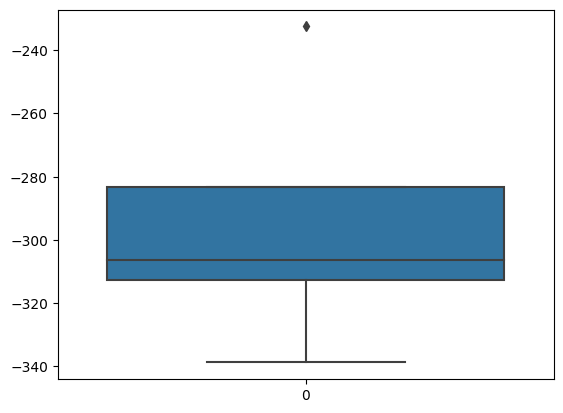

In [32]:
sns.boxplot(data=cv_results['test_score'])

<Axes: >

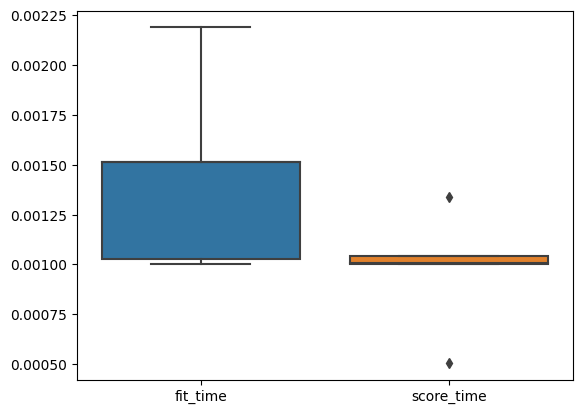

In [33]:
df_results_time = pd.DataFrame(cv_results)[['fit_time', 'score_time']]

sns.boxplot(data=df_results_time)

In [36]:
from sklearn.metrics import make_scorer, mean_absolute_error

# MAE personalizada, para que no esté negada, sería como la MAE normal, cuanto más pequeño el valor mejor
# scorer_mae = make_scorer(mean_absolute_error, greater_is_better=True)
# cv_results = cross_validate(model, X, y, scoring=scorer_mae)
# cv_results

# Calcular MAE normal manualmente
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error')
cv_results['test_score'] = cv_results['test_score'] * -1
cv_results

{'fit_time': array([0.00200105, 0.00199962, 0.00251937, 0.00106668, 0.00050545]),
 'score_time': array([0.00099874, 0.00144172, 0.00050569, 0.00095654, 0.00151587]),
 'test_score': array([220.38144928, 249.60757207, 285.90470845, 245.47929014,
        181.47689761])}

In [78]:
scorers = ('neg_mean_absolute_error', 'neg_root_mean_squared_error')

model = LinearRegression()
cv_results = cross_validate(model, X, y, scoring=scorers)
cv_results

{'fit_time': array([0.00402665, 0.00199938, 0.00095034, 0.00200224, 0.00099897,
        0.00202131, 0.00221777, 0.00100064, 0.00102019, 0.00200081]),
 'score_time': array([0.00197959, 0.0015645 , 0.00200391, 0.00100112, 0.0010004 ,
        0.        , 0.00099921, 0.00099897, 0.00097966, 0.00050688]),
 'test_neg_mean_absolute_error': array([-202.49285721, -231.64388207, -245.70208284, -300.66146012,
        -300.82271201, -242.69687642, -240.70991813, -249.36912743,
        -190.5792133 , -180.0413379 ]),
 'test_neg_root_mean_squared_error': array([-249.42329586, -303.00203268, -319.13283891, -364.0766886 ,
        -351.16290308, -290.4777104 , -319.45781238, -293.47279673,
        -238.34013859, -232.40998169])}

## Regresión

train_test_split + cross_val_score + varios modelos

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

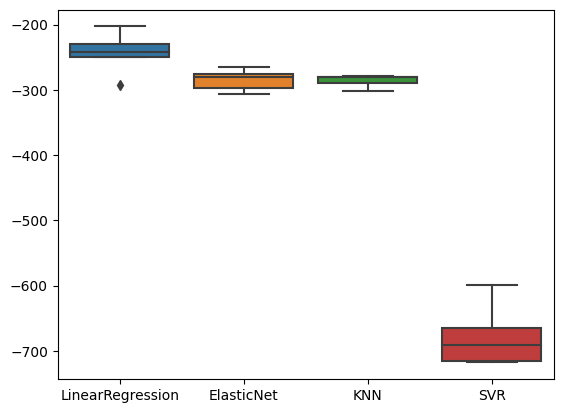

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = [ # lista
    ('LinearRegression', LinearRegression()), # tupla
    ('ElasticNet', ElasticNet()),
    ('KNN', KNeighborsRegressor(n_neighbors=21)),
    ('SVR', SVR())
    # otros modelos....
]

cv_results = [] # resultados validación cruzada
test_results = [] # resultados de .predict()
names = [] # nombres de los algoritmos para añadirlos en las gráficas de resultados

for name, model in models: 
    # Validación cruzada: cross validation con 5 particiones
    # results = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error')
    # cross validation con 7 particiones:
    results = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    cv_results.append(results)
    names.append(name)

    # Predicciones sobre el conjunto de test/validación (X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_results.append(rmse)

ax = sns.boxplot(data=cv_results)
ax.set_xticklabels(names);

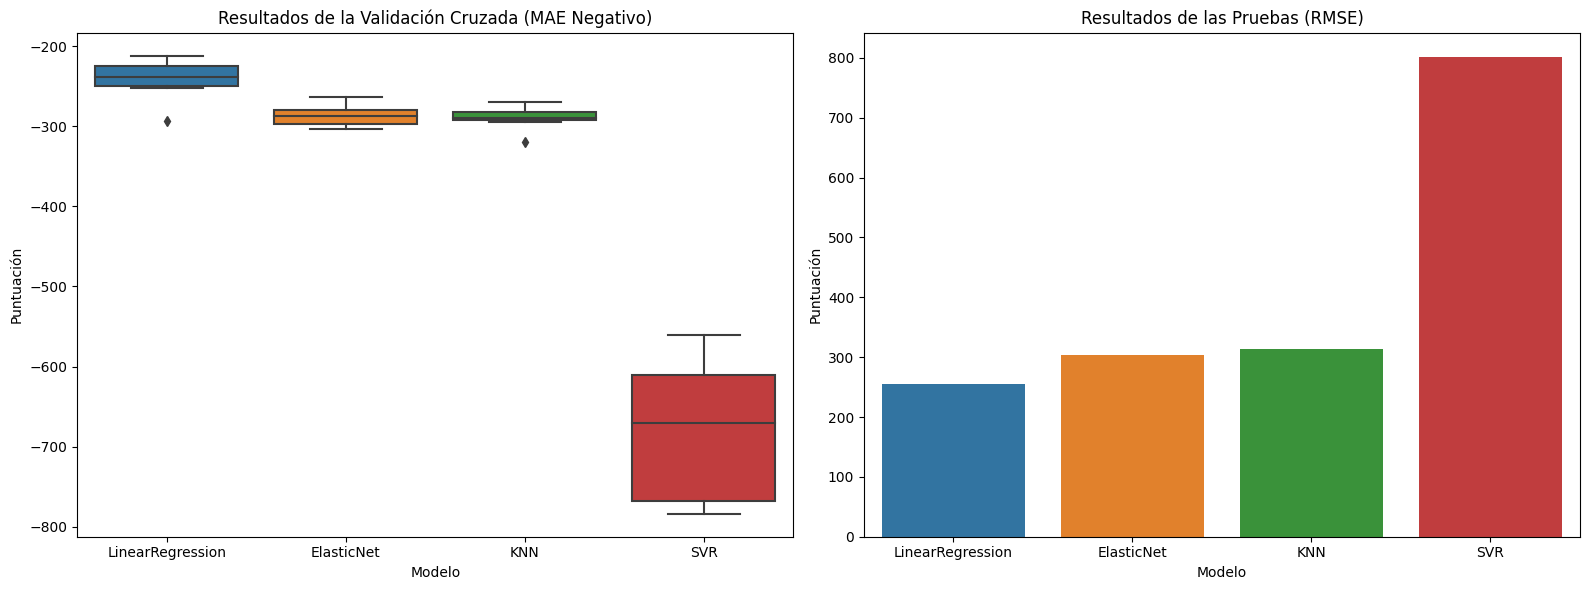

In [75]:
df_cv = pd.DataFrame(cv_results, index=names).T
df_test = pd.DataFrame(test_results, index=names).T

fig, axs = plt.subplots(ncols=2, figsize=(16,6))

sns.boxplot(data=df_cv, ax=axs[0])
axs[0].set_title('Resultados de la Validación Cruzada (MAE Negativo)')
axs[0].set_ylabel('Puntuación')
axs[0].set_xlabel('Modelo')

sns.barplot(data=df_test, ax=axs[1])
axs[1].set_title('Resultados de las Pruebas (RMSE)')
axs[1].set_ylabel('Puntuación')
axs[1].set_xlabel('Modelo')

plt.tight_layout()
plt.show()

## Clasificación binaria

* Clasificación binaria sex

In [90]:
df = sns.load_dataset('penguins').dropna().reset_index(drop=True)
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [88]:
X = pd.get_dummies(df.drop('sex', axis=1), drop_first=True)
y = df['sex'].map({'Male': 0, 'Female': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [94]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = [
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC())
]

cv_results = []
test_results = []
names = []

for name, model in models:
    names.append(name)

    cv_results.append(cross_val_score(model, X_train, y_train, scoring='f1'))
    # cv_results.append(cross_val_score(model, X_train, y_train, scoring='accuracy'))

    model.fit(X_train, y_train) # El modelo se resetea desde cero
    y_pred = model.predict(X_test)
    test_results.append(f1_score(y_test, y_pred))
    # test_results.append(accuracy_score(y_test, y_pred))

c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

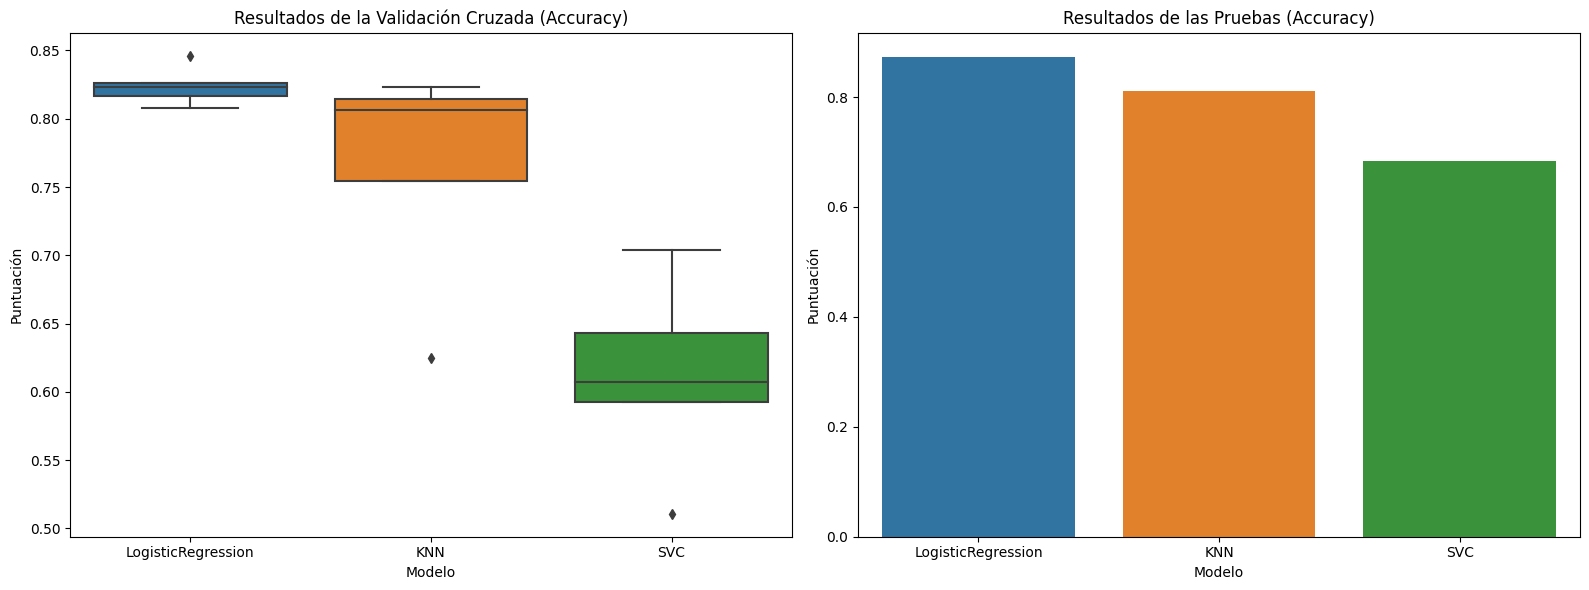

In [96]:
df_cv = pd.DataFrame(cv_results, index=names).T
df_test = pd.DataFrame(test_results, index=names).T

fig, axs = plt.subplots(ncols=2, figsize=(16,6))

sns.boxplot(data=df_cv, ax=axs[0])
axs[0].set_title('Resultados de la Validación Cruzada (Accuracy)')
axs[0].set_ylabel('Puntuación')
axs[0].set_xlabel('Modelo')

sns.barplot(data=df_test, ax=axs[1])
axs[1].set_title('Resultados de las Pruebas (Accuracy)')
axs[1].set_ylabel('Puntuación')
axs[1].set_xlabel('Modelo')

plt.tight_layout()
plt.show()

## Clasificación multiclase

* Clasificación multiclase species

In [98]:
df = sns.load_dataset('penguins').dropna().reset_index(drop=True)
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [99]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [107]:
models = [
    ('LogisticRegression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('SVC', SVC())
]

cv_results = []
test_results = []
names = []

for name, model in models:
    names.append(name)

    cv_results.append(cross_val_score(model, X_train, y_train, scoring='f1_weighted'))

    model.fit(X_train, y_train) # El modelo se resetea desde cero
    y_pred = model.predict(X_test)
    test_results.append(f1_score(y_test, y_pred, average='weighted'))

c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

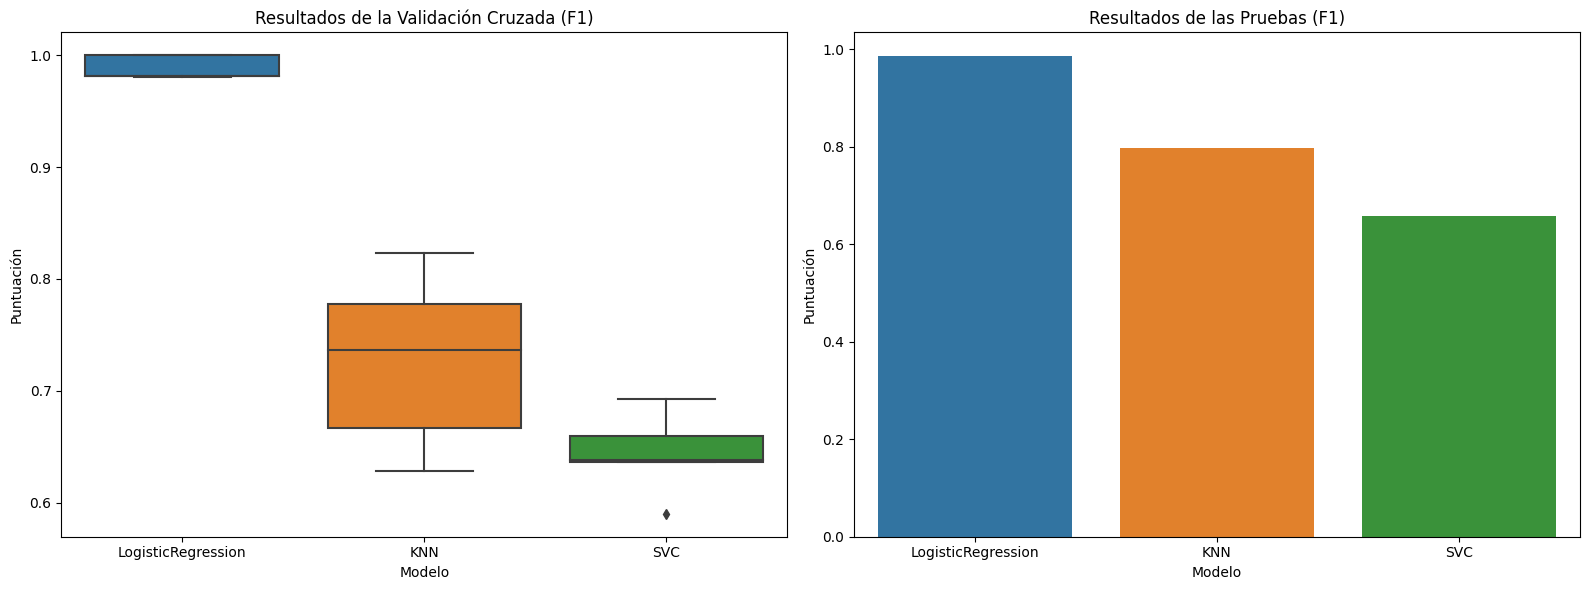

In [108]:
df_cv = pd.DataFrame(cv_results, index=names).T
df_test = pd.DataFrame(test_results, index=names).T

fig, axs = plt.subplots(ncols=2, figsize=(16,6))

sns.boxplot(data=df_cv, ax=axs[0])
axs[0].set_title('Resultados de la Validación Cruzada (F1)')
axs[0].set_ylabel('Puntuación')
axs[0].set_xlabel('Modelo')

sns.barplot(data=df_test, ax=axs[1])
axs[1].set_title('Resultados de las Pruebas (F1)')
axs[1].set_ylabel('Puntuación')
axs[1].set_xlabel('Modelo')

plt.tight_layout()
plt.show()